<a href="https://colab.research.google.com/github/wcaraker76/4GeeksProjects/blob/main/Satisfaction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt



np.random.seed(42)

In [4]:
#import the data 
data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [5]:
#display the data to see what it looks like
data

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [ ]:
#statistics for the data set 
data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
labels = data["TARGET"] #designate the labels

labels

0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

(array([73012.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3008.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

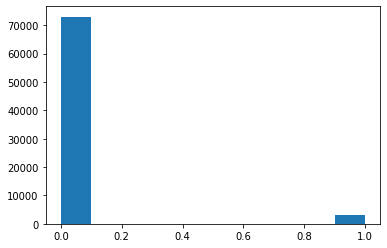

In [7]:
#see if the data is balanced
plt.hist(labels)

In [8]:
#remove the labels from the data 
data = data.drop("TARGET", axis=1) 
data

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


In [9]:
#count up the number of NaNs in the data set
na = data.isna().sum()

In [10]:
na.unique() #there is no missing data

array([0])

In [11]:
#display the values in the columns
data.value_counts()

ID      var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  ind_var1_0  ind_var1  ind_var2_0  ind_var2  ind_var5_0  ind_var5  ind_var6_0  ind_var6  ind_var8_0  ind_var8  ind_var12_0  ind_var12  ind_var13_0  ind_var13_corto_0  ind_var13_corto  ind_var13_largo_0  ind_var13_largo  ind_var13_medio_0  ind_var13_medio  ind_var13  ind_var14_0  ind_var14  ind_var17_0  ind_var17  ind_var18_0  ind_var18  ind_var19  ind_var20_0  ind_var20  ind_var24_0  ind_var24  ind_var25_cte  ind_var26_0  ind_var26_cte  ind_var26  ind_var25_0  ind_var25  ind_var27_0  ind_var28_0  ind_var28  ind_var27  ind_var29_0  ind_var29  ind_var30_0  ind_var30  ind_var31_0

In [12]:
#drop the columns that have the same data repeated throughout the columns.
cols_to_drop = data.columns[data.nunique()==1]
data.drop(cols_to_drop, axis=1, inplace=True)


In [13]:
#split the data 80/20 to get it ready to go in the model
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(data, labels, stratify=labels, \
                                                              test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, \
                                                      random_state=42)

In [14]:
#check the shape of the data
print(y_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_train_full.shape)
print(X_valid.shape)
print(X_train.shape)
print(X_test.shape)
X_train_full.shape

(15204,)
(45612,)
(15204,)
(60816,)
(15204, 336)
(45612, 336)
(15204, 336)


(60816, 336)

In [15]:
#normalize the data
# layer = tf.keras.layers.experimental.preprocessing.Normalization()
# layer.adapt(X_train)
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid   = scaler.transform(X_valid)

In [27]:
keras.backend.clear_session()


In [28]:
#create the model with normalization happening in the first layer, getting it as accurate as possible 
tf.random.set_seed(42)
model = keras.models.Sequential([
                                 
    keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
    
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               101100    
                                                                 
 dense_1 (Dense)             (None, 250)               75250     
                                                                 
 dense_2 (Dense)             (None, 200)               50200     
                                                                 
 dense_3 (Dense)             (None, 150)               30150     
                                                                 
 dense_4 (Dense)             (None, 1)                 151       
                                                                 
Total params: 256,851
Trainable params: 256,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=.2), loss="binary_crossentropy", metrics=["AUC"])

Epoch 1/5
1426/1426 [==============================] - 8s 5ms/step - loss: 0.1551 - auc: 0.7061 - val_loss: 0.1615 - val_auc: 0.7500
Epoch 2/5
1426/1426 [==============================] - 7s 5ms/step - loss: 0.1500 - auc: 0.7440 - val_loss: 0.1747 - val_auc: 0.7720
Epoch 3/5
1426/1426 [==============================] - 7s 5ms/step - loss: 0.1477 - auc: 0.7599 - val_loss: 0.1527 - val_auc: 0.7799
Epoch 4/5
1426/1426 [==============================] - 6s 4ms/step - loss: 0.1455 - auc: 0.7738 - val_loss: 0.1493 - val_auc: 0.7868
Epoch 5/5
1426/1426 [==============================] - 6s 4ms/step - loss: 0.1447 - auc: 0.7785 - val_loss: 0.1600 - val_auc: 0.7879


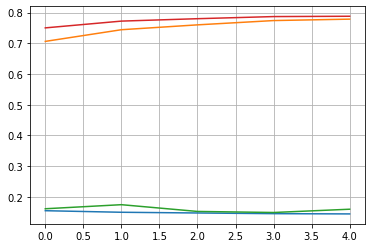

In [30]:
sat = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
plt.plot(pd.DataFrame(sat.history))
plt.grid(True)
plt.show()

In [24]:
#trying to get it to over fit
tf.random.set_seed(42)
model = keras.models.Sequential([
                                 
    keras.layers.Dense(336, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(275, activation="relu"),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(225, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(175, activation="relu"),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(125, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
    
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 336)               113232    
                                                                 
 dense_1 (Dense)             (None, 300)               101100    
                                                                 
 dense_2 (Dense)             (None, 275)               82775     
                                                                 
 dense_3 (Dense)             (None, 250)               69000     
                                                                 
 dense_4 (Dense)             (None, 225)               56475     
                                                                 
 dense_5 (Dense)             (None, 200)               45200     
                                                                 
 dense_6 (Dense)             (None, 175)               3

In [25]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=.15), loss="binary_crossentropy", metrics=["AUC"])

Epoch 1/5
1426/1426 [==============================] - 13s 9ms/step - loss: 0.1587 - auc: 0.6823 - val_loss: 0.1615 - val_auc: 0.7210
Epoch 2/5
1426/1426 [==============================] - 12s 8ms/step - loss: 0.1536 - auc: 0.7125 - val_loss: 0.1720 - val_auc: 0.7276
Epoch 3/5
1426/1426 [==============================] - 12s 8ms/step - loss: 0.1514 - auc: 0.7331 - val_loss: 0.1556 - val_auc: 0.7696
Epoch 4/5
1426/1426 [==============================] - 11s 8ms/step - loss: 0.1498 - auc: 0.7480 - val_loss: 0.1565 - val_auc: 0.7444
Epoch 5/5
1426/1426 [==============================] - 11s 8ms/step - loss: 0.1481 - auc: 0.7587 - val_loss: 0.1637 - val_auc: 0.7768


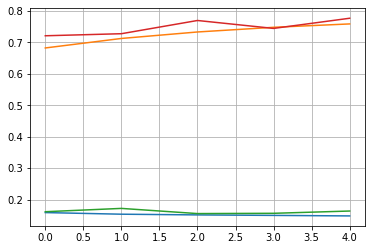

In [26]:
sat = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
plt.plot(pd.DataFrame(sat.history))
plt.grid(True)
plt.show()